In [1]:
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# damit werden die rosa pandas-warnungen ignoriert

Daten einlesen 

In [2]:
#Daten sind von Boomberg und FuW-Datenbank und wurden in Excel aufbereitet.
#Sie liegen im gleichen Ordner wie das Jupyter-Notebook
path = ("SPICEO_bereinigt.xlsx")
df = pd.read_excel(path)

Datensatz überprüfen und Übersicht gewinnen.

In [3]:
df.head()

,Unternehmen,GanzerName,seit,CUR_EMPLOYEES,CRNCY_ADJ_MKT_CAP,CHG_PCT_1YR,px_01.11.2016,px last,chg_pct_2yr,Suchbegriff,sex
0,ABB,Ulrich Spiesshofer,15.09.2013,134800.0,44251.906068,-22.039730,20.12,20.41,1.441352,Ulrich Spiesshofer ABB,m
1,Addex,Tim Dyer,01.06.2013,8.0,66.268552,4.035874,2.36,2.32,-1.694915,Tim Dyer Addex,m
2,Adecco,Alain Dehaze,01.09.2015,34000.0,8067.272145,-38.579580,58.30,48.43,-16.929674,Alain Dehaze Adecco,m
3,Adval Tech,René Rothen,01.08.2012,1415.0,171.550000,1.558737,233.00,235.00,0.858369,René Rothen Adval Tech,m
4,Aevis Victoria,Antoine Hubert,02.07.2012,2887.0,955.666986,2.702701,59.50,60.80,2.184874,Antoine Hubert Aevis Victoria,m


Welches sind die zehn grössten Unternehmen gemäss Marktkapitalisierung (Mkt_Cap)? Wie viele CEO sind Frauen?

In [4]:
df.sort_values('CRNCY_ADJ_MKT_CAP', ascending=False).head(10)

,Unternehmen,GanzerName,seit,CUR_EMPLOYEES,CRNCY_ADJ_MKT_CAP,CHG_PCT_1YR,px_01.11.2016,px last,chg_pct_2yr,Suchbegriff,sex
125,Nestlé,Mark Schneider,01.01.2017,323000.0,257353.260000,-0.861357,71.550,84.020,17.428372,Mark Schneider Nestlé,m
127,Novartis,Vas Narasimhan,01.02.2018,122000.0,224454.984160,5.263160,69.850,88.000,25.984252,Vas Narasimhan Novartis,m
146,Roche,Severin Schwan,04.03.2008,93734.0,208912.685940,4.082511,224.600,242.200,7.836153,Severin Schwan Roche,m
178,UBS,Sergio Ermotti,15.11.2011,65556.0,54821.327869,-13.304310,13.750,14.220,3.418182,Sergio Ermotti UBS,m
198,Zurich Insurance,Mario Greco,07.03.2016,51633.0,47069.236397,3.138437,256.000,311.000,21.484375,Mario Greco Zurich Insurance,m
0,ABB,Ulrich Spiesshofer,15.09.2013,134800.0,44251.906068,-22.039730,20.120,20.410,1.441352,Ulrich Spiesshofer ABB,m
49,Richemont,Jérôme Lambert,10.09.2018,28740.0,43443.972000,-17.983740,63.300,75.660,19.526066,Jérôme Lambert Richemont,m
58,Credit Suisse,Tidjane Thiam,01.07.2015,45560.0,32806.410426,-19.250250,13.171,12.835,-2.551059,Tidjane Thiam Credit Suisse,m
169,Swiss Re,Christian Mumenthaler,01.07.2016,14613.0,30123.587606,-4.702730,91.950,88.960,-3.251767,Christian Mumenthaler Swiss Re,m
103,LafargeHolcim,Jan Jenisch,16.10.2017,81000.0,28069.544950,-15.724980,52.150,46.250,-11.313519,Jan Jenisch LafargeHolcim,m


In [5]:
df['sex'].value_counts()

m    195
w      7
Name: sex, dtype: int64

Datentypen überpüfen

In [6]:
df.dtypes

Unternehmen           object
GanzerName            object
seit                  object
CUR_EMPLOYEES        float64
CRNCY_ADJ_MKT_CAP    float64
CHG_PCT_1YR          float64
px_01.11.2016        float64
px last              float64
chg_pct_2yr          float64
Suchbegriff           object
sex                   object
dtype: object

Die Daten in der Spalte Seit sind noch im String-Format.

In [7]:
df['seit'] = pd.to_datetime(df['seit'])
#standard format ist yyyy-mm-dd, das könnte man mit ,format =% spezifizieren.

In [8]:
#nun wollen wir nur die CEO, die mindestens seit 1.1.17 im Amt sind, und nennen das gekürzte Dataframe df2017
df2017 = df[df['seit'] <= "2017-01-01"]
df2017.shape

(167, 11)

In [11]:
#Das File schrumpf von 202 auf 167 Zeilen. Welche CEO sind frisch im Amt und fallen weg?
df_neu = df[df['seit'] > "2017-01-01"]
df_neu["GanzerName"]

13                  Kevin Toland
19               Sandra Lienhart
27                  David Veitch
34             Beat Frischknecht
47            Andreas Friederich
49                Jérôme Lambert
51             Ernesto Occhiello
53             René Lenggenhager
60                   Stefan Butz
64              Giorgio Pradelli
68                 Oliver Walker
69                   Knut Zimmer
72         Jean-Claude Clémençon
85                    Urs Ryffel
87              Jean-Paul Clozel
88                    André Wyss
94               Bernhard Hodler
102              Joost de Bruijn
103                  Jan Jenisch
105                 Richard Mora
108                Frank Rehfeld
109                 Lukas Ruflin
116    Hans-Kristian Hoejsgaard 
124              Patrick Amstutz
127               Vas Narasimhan
144                   Gael Hedou
149             Marc Aeschlimann
159                 Paul Schuler
160               Arnd Kaldowski
162              Christian Walti
179       

In [12]:
#Die Spalte Suchbegriff brauchen wir für die Selenium-Abfrage, ich speichere sie als Liste "Suchliste":
suchliste = df2017["Suchbegriff"]

In [13]:
#weiter mit Selenium, zuerst die Importe 
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [14]:
#Import, um Dev Tool offen zu haben

from selenium.webdriver.chrome.options import Options

#SMD besuchen, mit geöffneten Dev Tools
chrome_options = Options() #Options Variabel vorbereiten
chrome_options.add_argument("-auto-open-devtools-for-tabs") #Das Argument ergänzen.
driver = webdriver.Chrome(chrome_options=chrome_options)
search_url = "http://www.smd.ch"
driver.get(search_url)
driver.find_element_by_name('j_username').send_keys('fuw-pr')

In [15]:
#jetzt mit Passwort einloggen
passwort = driver.find_element_by_name("j_password")
passwort.send_keys("esemde2015")
passwort.send_keys(Keys.RETURN)
#driver.find_element_by_class('loginbutton').click()

In [16]:
#gewünschte Suchperiode eingeben: mich interessiert 1.1.2017 bis 1.1.2019
periodestart = driver.find_element_by_id("pubDate_lower")
periodestart.clear()
periodestart.send_keys("2017-01-01")

In [17]:
periodeend = driver.find_element_by_id("pubDate_upper")
periodeend.clear()
periodeend.send_keys("2019-01-01")

Jetzt für jeden CEO aus der Suchliste die Anzahl SMD-Einträge abfragen und in der Trefferliste schreiben 

In [18]:
#Wichtig: Mit time.sleep Verzögerungen einbauen
import time
trefferliste = []
for i in suchliste:
    smdsuchfeld = driver.find_element_by_id("SEARCH_query")
    time.sleep(.5)
    smdsuchfeld.clear()
    smdsuchfeld.send_keys(i)
    smdsuchfeld.send_keys(Keys.RETURN)
    time.sleep(1)
    #wenn kein Eintrag, gibts statt null das Element totaldouments nicht und der loop würde stoppen.
    #in diesen Ausnahmefällen soll der Suchbegriff gedruckt und in die Trefferliste eine 0 geschrieben werden.
    try:
        treffer = driver.find_element_by_id('totalcountetdocuments')
        trefferliste.append(treffer.text)
    except:
        print(i)
        trefferliste.append(0)

Volkert Klaucke Arundel
Fred Rüegg Elma Electronic
Arnaud Vial Pargesa
Jean-Claude Roch Perfect Holding
Ralph Siegle Plazza
Luigi Mion Zwahlen & Mayr


In [ ]:
Aus der Trefferliste eine Panda-Serie namens smdhits machen und am dataframe df2017 beifügen

In [22]:
smdhits = pd.Series(trefferliste)
df2017['smdhits'] = smdhits.values
df2017.head()

,Unternehmen,GanzerName,seit,CUR_EMPLOYEES,CRNCY_ADJ_MKT_CAP,CHG_PCT_1YR,px_01.11.2016,px last,chg_pct_2yr,Suchbegriff,sex,smdhits
0,ABB,Ulrich Spiesshofer,2013-09-15,134800.0,44251.906068,-22.039730,20.12,20.41,1.441352,Ulrich Spiesshofer ABB,m,1428
1,Addex,Tim Dyer,2013-01-06,8.0,66.268552,4.035874,2.36,2.32,-1.694915,Tim Dyer Addex,m,24
2,Adecco,Alain Dehaze,2015-01-09,34000.0,8067.272145,-38.579580,58.30,48.43,-16.929674,Alain Dehaze Adecco,m,360
3,Adval Tech,René Rothen,2012-01-08,1415.0,171.550000,1.558737,233.00,235.00,0.858369,René Rothen Adval Tech,m,17
4,Aevis Victoria,Antoine Hubert,2012-02-07,2887.0,955.666986,2.702701,59.50,60.80,2.184874,Antoine Hubert Aevis Victoria,m,229


In [23]:
#zwischendurch das neue DF abspeichernd
df2017.to_csv('ceo_media.csv', index=False)

In [24]:
df2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 201
Data columns (total 12 columns):
Unternehmen          167 non-null object
GanzerName           167 non-null object
seit                 167 non-null datetime64[ns]
CUR_EMPLOYEES        163 non-null float64
CRNCY_ADJ_MKT_CAP    167 non-null float64
CHG_PCT_1YR          155 non-null float64
px_01.11.2016        152 non-null float64
px last              165 non-null float64
chg_pct_2yr          152 non-null float64
Suchbegriff          167 non-null object
sex                  167 non-null object
smdhits              167 non-null object
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 17.0+ KB


In [25]:
#noch sind die SMD-Treffer im string-format, soll aber ein integer sein: 
df2017['smdhits'] = pd.to_numeric(df2017['smdhits'])

In [26]:
#CEOs mit den meisten SMD-Treffern?
df2017.sort_values('smdhits', ascending=False).head(10)

,Unternehmen,GanzerName,seit,CUR_EMPLOYEES,CRNCY_ADJ_MKT_CAP,CHG_PCT_1YR,px_01.11.2016,px last,chg_pct_2yr,Suchbegriff,sex,smdhits
58,Credit Suisse,Tidjane Thiam,2015-01-07,45560.0,32806.410426,-19.250250,13.171,12.835,-2.551059,Tidjane Thiam Credit Suisse,m,3366
178,UBS,Sergio Ermotti,2011-11-15,65556.0,54821.327869,-13.304310,13.750,14.220,3.418182,Sergio Ermotti UBS,m,3022
125,Nestlé,Mark Schneider,2017-01-01,323000.0,257353.260000,-0.861357,71.550,84.020,17.428372,Mark Schneider Nestlé,m,2047
153,SNB,Thomas Jordan,2012-04-18,902.0,542.000000,29.047620,1567.000,5420.000,245.883854,Thomas Jordan SNB,m,1773
0,ABB,Ulrich Spiesshofer,2013-09-15,134800.0,44251.906068,-22.039730,20.120,20.410,1.441352,Ulrich Spiesshofer ABB,m,1428
166,Swatch,Nick Hayek,2003-06-01,36200.0,19087.059000,-9.600000,56.850,67.800,19.261214,Nick Hayek Swatch,m,1424
146,Roche,Severin Schwan,2008-04-03,93734.0,208912.685940,4.082511,224.600,242.200,7.836153,Severin Schwan Roche,m,1128
170,Swisscom,Urs Schaeppi,2013-07-11,19850.0,23777.091837,-8.565737,448.300,459.000,2.386795,Urs Schaeppi Swisscom,m,902
67,EMS-Chemie,Magdalena Martullo-Blocher,2004-06-01,2912.0,13097.855680,-14.127590,498.250,560.000,12.393377,Magdalena Martullo-Blocher EMS-Chemie,w,828
28,Basler Kantonalbank,Guy Lachappelle,2013-02-27,1244.0,3249.847068,12.230220,67.820,78.000,15.010321,Guy Lachappelle Basler Kantonalbank,m,732


Wenig erstaunlich haben die CEO der Grosskonzerne am meisten Medienpräsenz. Nicht in das Schema passen Magdalena Martullo-Blocher, Guy Lachappelle und natürlich Thomas Jordan. Letzere ist schliesslich kein "normaler CEO" sondern Nationabankpräsident. Guy Lachappelle wurde zum Medienstar nach seiner Ernennung zum Raiffeisen-Chef. In einem normalen Jahr wie 2017 hatte er nur 40 Einträge.

In [27]:
#Von welchen CEO hört man praktisch nie etwas?
df2017.sort_values('smdhits').head(10)

,Unternehmen,GanzerName,seit,CUR_EMPLOYEES,CRNCY_ADJ_MKT_CAP,CHG_PCT_1YR,px_01.11.2016,px last,chg_pct_2yr,Suchbegriff,sex,smdhits
199,Zwahlen & Mayr,Luigi Mion,2015-09-25,183.0,18.954000,23.287670,200.00,270.000,35.000000,Luigi Mion Zwahlen & Mayr,m,0
65,Elma Electronic,Fred Rüegg,2013-01-09,732.0,92.310768,2.278481,350.25,404.000,15.346181,Fred Rüegg Elma Electronic,m,0
12,Arundel,Volkert Klaucke,2016-01-26,14.0,49.880041,-53.010550,8.50,3.300,-61.176471,Volkert Klaucke Arundel,m,0
134,Pargesa,Arnaud Vial,2013-01-06,15816.0,6136.638283,-15.049970,66.15,72.250,9.221466,Arnaud Vial Pargesa,m,0
137,Perfect Holding,Jean-Claude Roch,2009-06-01,1.0,2.534256,-53.333330,0.03,0.014,-53.333333,Jean-Claude Roch Perfect Holding,m,0
140,Plazza,Ralph Siegle,2015-06-01,14.0,458.451000,-4.291845,235.90,223.000,-5.468419,Ralph Siegle Plazza,m,0
24,Banque Profil de Gestion,Silvana Cavanna,2008-06-01,28.0,51.084324,-27.755100,2.30,3.540,53.913043,Silvana Cavanna Banque Profil de Gestion,w,2
71,Forbo,Stephan Bauer,2014-01-01,5586.0,2808.000000,1.628664,1254.00,1560.000,24.401914,Stephan Bauer Forbo,m,3
48,Cicor Technologies,Alexander Hagemann,2016-01-09,1993.0,139.880834,-4.632013,24.35,48.200,97.946612,Alexander Hagemann Cicor Technologies,m,3
114,LumX Group,Arpad Busson,2015-07-15,66.0,16.122065,-17.777780,0.25,0.148,-40.800000,Arpad Busson LumX Group,m,4


Zugegeben sind da auch ein paar sehr exotische Unternehmen darunter. Einige sind gar nicht so klein. Ok, Pargesa ist eine an der Six kotierte Genfer Beteiligungsgesellschaft, die 50% an GBL besitzt, einer auf Unternehmensbeteiligungen spezialisierten belgischen Holdinggesellschaft. Diese ist Grossaktionärin von SGS und LafargeHolcim. Aber was ist mit Stephan Bauer von Forbo?

In [28]:
#neue Spalten für die Medienpräsenz im Verhältnis zur Marketcap und Mitarbeiter:
df2017['hitsmarketcap'] = df2017['smdhits'] / df2017['CRNCY_ADJ_MKT_CAP']
df2017['hitsempl'] = df2017['smdhits'] / df2017['CUR_EMPLOYEES']

In [32]:
# Das sind die stillen Schaffer, mit wenig Einträgen aber mit recht grossen Firmen (MarketCap)
df2017.sort_values('hitsmarketcap').head(20)["Suchbegriff"]

199                  Luigi Mion Zwahlen & Mayr
140                        Ralph Siegle Plazza
65                  Fred Rüegg Elma Electronic
134                        Arnaud Vial Pargesa
137           Jean-Claude Roch Perfect Holding
12                     Volkert Klaucke Arundel
71                         Stephan Bauer Forbo
62                  Julián Díaz González Dufry
152             Heinz O. Baumgartner Schweiter
23     Pascal Kiener Banque Cantonale Vaudoise
146                       Severin Schwan Roche
50     Patrick Combes Compagnie Fin. Tradition
76                     Gilles Andrier Givaudan
174                       David Arnott Temenos
198               Mario Greco Zurich Insurance
156                             Frankie Ng SGS
125                      Mark Schneider Nestlé
150                  Thomas Oetterli Schindler
168                René Zahnd Swiss Prime Site
29                  Lars van der Haegen Belimo
Name: Suchbegriff, dtype: object

0 durch n gibt natürlich 0, interessanter wird es ab Platz 6:

In [45]:
# Das sind die stillen Schaffer unter den CEO mit relativ vielen Mitarbeitern 
df2017.sort_values('hitsempl').head(20)["Suchbegriff"]

134                        Arnaud Vial Pargesa
199                  Luigi Mion Zwahlen & Mayr
65                  Fred Rüegg Elma Electronic
12                     Volkert Klaucke Arundel
137           Jean-Claude Roch Perfect Holding
140                        Ralph Siegle Plazza
71                         Stephan Bauer Forbo
62                  Julián Díaz González Dufry
156                             Frankie Ng SGS
48       Alexander Hagemann Cicor Technologies
30                       Lorenz Wyss Bell Food
152             Heinz O. Baumgartner Schweiter
50     Patrick Combes Compagnie Fin. Tradition
38                       Jacques Sanche Bucher
150                  Thomas Oetterli Schindler
101                      Detlef Trefzger Kühne
139               Rochus Kobler Phoenix Mecano
118                Martin Kaufmann MeierTobler
125                      Mark Schneider Nestlé
198               Mario Greco Zurich Insurance
Name: Suchbegriff, dtype: object

In [47]:
#und das sind die Glamour-Boys gemessen an der Marktkapitalisierung ihrer Bude
df2017.sort_values('hitsmarketcap', ascending=False).head(20)["Suchbegriff"]

153                                    Thomas Jordan SNB
100                              André Kudelski Kudelski
83     Bernhard Burgener Highlight Event and Entertai...
15                               Jan Lüscher Asmallworld
106                           Fabio Cannavale lastminute
107                            Anil Srivastava Leclanché
148                                Thomas Meier Santhera
138                    Nicolas Eichenberger Perrot Duval
120                            Hans Brändle Meyer Burger
79                         Marc Müller Groupe Minoteries
63                   Rainer Isenrich Edisun Power Europe
104                           Roger von der Weid Lalique
191                               Carlos Moreira WISeKey
141                            Jean Claude Bregy Poenina
84                            Thomas Eisenring  HOCHDORF
136                  Thomas Wolfensberger Peach Property
42                                 Reiner Pichler Calida
176                            

Jordans Rolle als Nationabankpräsident ist nicht mit einem normalen CEO vergleichbar. Bei André Kudelski ist der Name das Problem. Mit dem Suchbegriff "André Kudelski" halbiert sich die Zahl der Einträge auf 335.

In [43]:
#und das sind die Glamour-Boys gemessen an der Mitarbeiterzahl
df2017.sort_values('hitsempl', ascending=False).head(20)["Suchbegriff"]

1                            Tim Dyer Addex
63      Rainer Isenrich Edisun Power Europe
32               Norbert Patt Titlis-Bahnen
44                  Diana Harbort Cassiopea
136     Thomas Wolfensberger Peach Property
153                       Thomas Jordan SNB
148                   Thomas Meier Santhera
126                     Stefan Weber Newron
123               Christoph Caviezel Mobimo
194      Iosif Bakaleynik Züblin Immobilien
190         Daniel Petitjean Warteck Invest
107               Anil Srivastava Leclanché
79            Marc Müller Groupe Minoteries
5               Marc-Henri Beausire Airesis
28      Guy Lachappelle Basler Kantonalbank
191                  Carlos Moreira WISeKey
31               André Rüegg Bellevue Group
143    Giacomo Balzarini PSP Swiss Property
82                  Martin Durchschlag Hiag
73                   Alexander Friedman GAM
Name: Suchbegriff, dtype: object

Tim Dyer von Addex führt 7 Leute aber schafft es in zwei Jahren 24 Mal in die Medien!

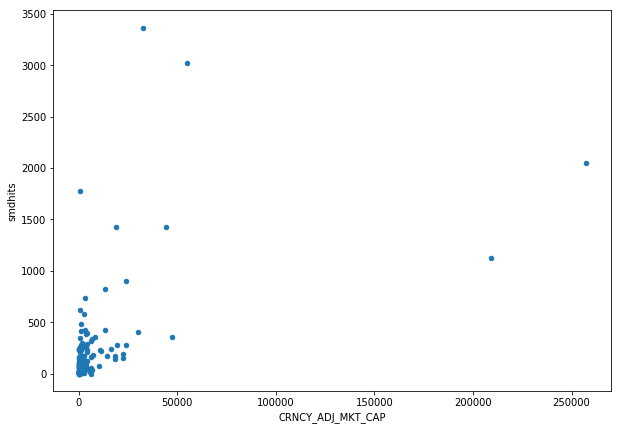

In [41]:
#Scatterplot mit Marktkapitalisierung in Mio. und SMD-Treffer
df2017.plot(kind='scatter', 
        x='CRNCY_ADJ_MKT_CAP', 
        y='smdhits',
        figsize=(10,7))

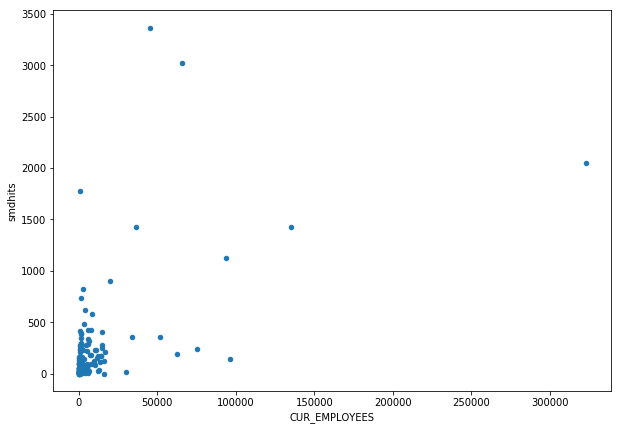

In [42]:
#Scatterplot mit Anzahl Mitarbeiter und SMD-Treffer
df2017.plot(kind='scatter', 
        x='CUR_EMPLOYEES', 
        y='smdhits',
        figsize=(10,7))

Das Bild ist immer ähnlich: CS und UBS-CEO haben relativ viel Medienpräsenz. Mark Schneider ist zwar oft in den Medien, Nestlé ist aber auch ein Riese.